In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:,.2f}'.format)
%matplotlib inline

In [2]:
# !pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from geopy.geocoders import Nominatim
from geopy import distance

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Приведение-названия-колонок-к-единому-стилю" data-toc-modified-id="Приведение-названия-колонок-к-единому-стилю-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Приведение названия колонок к единому стилю</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#rooms" data-toc-modified-id="rooms-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>rooms</a></span></li><li><span><a href="#first_day_exposition" data-toc-modified-id="first_day_exposition-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>first_day_exposition</a></span></li></ul></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#balcony" data-toc-modified-id="balcony-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>balcony</a></span></li><li><span><a href="#locality_name" data-toc-modified-id="locality_name-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>locality_name</a></span></li><li><span><a href="#floors_total" data-toc-modified-id="floors_total-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>floors_total</a></span></li><li><span><a href="#living_area" data-toc-modified-id="living_area-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>living_area</a></span></li><li><span><a href="#kitchen_area" data-toc-modified-id="kitchen_area-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>kitchen_area</a></span></li><li><span><a href="#is_apartment" data-toc-modified-id="is_apartment-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>is_apartment</a></span></li><li><span><a href="#airports_nearest" data-toc-modified-id="airports_nearest-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>airports_nearest</a></span></li><li><span><a href="#days_exposition" data-toc-modified-id="days_exposition-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>days_exposition</a></span></li><li><span><a href="#parks_around_3000,-ponds_around_3000" data-toc-modified-id="parks_around_3000,-ponds_around_3000-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>parks_around_3000, ponds_around_3000</a></span></li><li><span><a href="#city_centers_nearest" data-toc-modified-id="city_centers_nearest-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>city_centers_nearest</a></span></li><li><span><a href="#parks_nearest" data-toc-modified-id="parks_nearest-2.1.11"><span class="toc-item-num">2.1.11&nbsp;&nbsp;</span>parks_nearest</a></span></li><li><span><a href="#ponds_nearest" data-toc-modified-id="ponds_nearest-2.1.12"><span class="toc-item-num">2.1.12&nbsp;&nbsp;</span>ponds_nearest</a></span></li><li><span><a href="#ceiling_height" data-toc-modified-id="ceiling_height-2.1.13"><span class="toc-item-num">2.1.13&nbsp;&nbsp;</span>ceiling_height</a></span></li></ul></li><li><span><a href="#Оптимизация-памяти" data-toc-modified-id="Оптимизация-памяти-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Оптимизация памяти</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#цена-квадратного-метра" data-toc-modified-id="цена-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>цена квадратного метра</a></span></li><li><span><a href="#день-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="день-недели,-месяц-и-год-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>день недели, месяц и год публикации объявления</a></span></li><li><span><a href="#этаж-квартиры;-варианты-—-первый,-последний,-другой" data-toc-modified-id="этаж-квартиры;-варианты-—-первый,-последний,-другой-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>этаж квартиры; варианты — первый, последний, другой</a></span></li><li><span><a href="#соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей" data-toc-modified-id="соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>соотношение жилой и общей площади, а также отношение площади кухни к общей</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#время-продажи-квартиры" data-toc-modified-id="время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>время продажи квартиры</a></span></li><li><span><a href="#факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="факторы-влияющие-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>факторы влияющие на стоимость квартиры</a></span></li><li><span><a href="#зависимость-от-даты-размещения:-дня-недели,-месяца-и-года" data-toc-modified-id="зависимость-от-даты-размещения:-дня-недели,-месяца-и-года-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>зависимость от даты размещения: дня недели, месяца и года</a></span></li><li><span><a href="#сегмент-квартир-в-центре" data-toc-modified-id="сегмент-квартир-в-центре-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>сегмент квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Изучение данных из файла

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [5]:
df.shape

(23699, 22)

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [7]:
# Не использовала df.describe().T потому что средние значения переконвертнулись в формат, визуально не сравнимый с медианой
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


### Приведение названия колонок к единому стилю

In [8]:
df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']

In [9]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

### Вывод

- У нас достаточно много фичей - 22, есть пропущенные значения и есть что преобразовать для оптимизации памяти
- Тут можно поверхностно оценить медиану и среднюю и там где среднее значительно выше - значит выборка тяготеет к выбросам, так как средняя к ним не устойчива. Например среднее для days_exposition - 180, а медиана 95
- Сразу поправили названия колонок, например cityCenters_nearest - не звучит по питонячьему
- Проверили наличие дубликатов, на всякий случай, их нет

## Предобработка данных

Округлим total_area, living_area и kitchen_area до 1 знака после запятой

In [11]:
def round_area(area):
    return round(area, 1)

In [12]:
df['total_area'] = df['total_area'].apply(round_area)
df['living_area'] = df['living_area'].apply(round_area)
df['kitchen_area'] = df['kitchen_area'].apply(round_area)

In [13]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


#### rooms

In [14]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Для rooms у нас есть знаечния 0, возможно такое имеет место быть, если это аппартаменты, или квартира-студия, или свободная планировка, рассмотрим поближе, что это за наблюдения

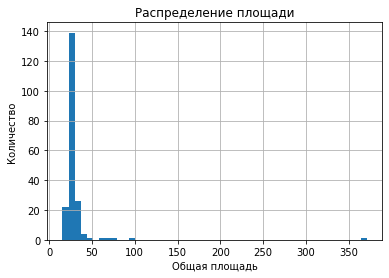

In [15]:
df[df['rooms'] == 0]['total_area'].hist(bins=50)
df[df['rooms'] == 0]['total_area'].median()
plt.title('Распределение площади')
plt.ylabel('Количество')
plt.xlabel('Общая площадь')
plt.show()

Видим, что большинство наблюдений у нас приходится на 26.1 total_area что подтверждает предположение, тем не менее, у нас есть наблюдения и около 60, 80 и даже около 100 для фичи total_area. Соответственно, рассмотрим и их

In [16]:
df[(df['rooms'] == 0) & (df['total_area'] > 40)].sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
16130,14,"5,000,000.00",42.10,2018-04-13T00:00:00,0,nan,20.00,30.00,10,NaN,...,nan,nan,Санкт-Петербург,"50,605.00","15,933.00",0.00,nan,0.00,nan,170.00
7237,8,"2,999,000.00",42.60,2017-11-27T00:00:00,0,nan,16.00,25.70,2,NaN,...,nan,2.00,деревня Кудрово,nan,nan,nan,nan,nan,nan,45.00
15319,4,"5,970,000.00",43.30,2017-07-20T00:00:00,0,2.80,9.00,28.20,2,NaN,...,nan,2.00,Санкт-Петербург,"23,617.00","5,223.00",0.00,nan,1.00,874.00,30.00
10008,20,"5,050,000.00",44.20,2017-09-14T00:00:00,0,2.70,9.00,32.20,1,NaN,...,nan,nan,Санкт-Петербург,"24,329.00","5,955.00",0.00,nan,2.00,520.00,69.00
13613,16,"8,100,000.00",58.40,2019-04-26T00:00:00,0,3.30,7.00,33.00,6,NaN,...,nan,nan,Санкт-Петербург,"14,509.00","8,288.00",0.00,nan,0.00,nan,nan
21227,0,"8,200,000.00",71.00,2017-07-21T00:00:00,0,5.80,5.00,68.00,5,NaN,...,nan,0.00,Санкт-Петербург,"20,170.00","1,261.00",2.00,295.00,3.00,366.00,30.00
3458,6,"7,400,000.00",73.60,2017-05-18T00:00:00,0,nan,3.00,50.00,1,NaN,...,nan,0.00,Санкт-Петербург,"26,581.00","6,085.00",0.00,nan,1.00,348.00,60.00
20082,10,"16,300,000.00",98.40,2017-11-08T00:00:00,0,3.10,5.00,60.50,2,NaN,...,nan,nan,Санкт-Петербург,"26,972.00","5,819.00",0.00,nan,1.00,674.00,537.00
19392,5,"71,000,000.00",371.00,2018-07-26T00:00:00,0,3.57,7.00,nan,6,NaN,...,nan,nan,Санкт-Петербург,"25,257.00","6,060.00",1.00,761.00,1.00,584.00,90.00


Таких значений всего 9, а пропусков по ним по разным фичам еще много, уберем их.

In [17]:
df = df[~((df['rooms'] == 0) & (df['total_area'] > 40))]
df.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23685,9,"9,700,000.00",133.80,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.80,nan,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,nan
23686,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,...,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23687,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,...,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23688,13,"11,475,000.00",76.80,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,...,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00


Переведем 0 в 1 для rooms

In [18]:
df['rooms'] = df['rooms'].replace(0, 1)

#### first_day_exposition

Перевели дату в формат даты для корректного извлечения данных из нее

In [19]:
df['first_day_exposition'] =  pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
df.sample(random_state=100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20181,10,"3,650,000.00",47.00,2017-10-24,2,nan,9.00,27.50,6,NaN,...,8.20,nan,посёлок Шушары,"19,134.00","29,754.00",0.00,nan,0.00,nan,389.00


### Обработка пропусков

In [21]:
df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1902
kitchen_area             2269
days_exposition          3180
ponds_around_3000        5517
parks_around_3000        5517
city_centers_nearest     5518
airports_nearest         5541
ceiling_height           9192
balcony                 11514
ponds_nearest           14586
parks_nearest           15613
is_apartment            20915
dtype: int64

Итого пропуски в фичах в долях:
- locality_name              49
- floors_total               86
- living_area              1903
- kitchen_area             2278
- days_exposition          3181
- ponds_around_3000        5518
- parks_around_3000        5518
- city_centers_nearest     5519
- airports_nearest         5542
- ceiling_height           9195
- balcony                 11519
- ponds_nearest           14589
- parks_nearest           15620
- is_apartment            20924

Больше всего пропусков в is_apartment, parks_nearest, ponds_nearest, balcony, ceiling_height. В ряде фитч количество пропусков почти одинаковое ~ 5518, возможно часть наблюдений имеют такие пропуски ввиду отсутствия такого поля для заполнения изначально.

Рассмотрим поближе пропуски.

#### balcony

In [22]:
df['balcony'].value_counts()

1.00    4195
0.00    3756
2.00    3657
5.00     304
4.00     183
3.00      81
Name: balcony, dtype: int64

In [23]:
len(df[df['balcony'].isna()])

11514

Пропусков достаточно много, скорее всего данные о пропусках не известны, так как балкона нет, можно заменить на 0

In [24]:
df['balcony'] = df['balcony'].fillna(0)

In [25]:
len(df[df['balcony'].isna()])

0

#### locality_name

In [26]:
len(df[df['locality_name'].isna()])

49

Пропущенные значеня из locality_name это всего 0.002(49 наблюдений) или 0.2%, что незначительно, при этом восстановить категориальную фичу по аналогичным данным не представляется возможным: у нас нет геолокации или иных данных, позволяющих однозначно определить какая это локация. Можно было бы заполнить такие пропуски как unknown, но тогда условно адрес в центре города и адрес в деревне будут приравнены, а в реальности сильно влиять на строимость. Удалим такие записи. 

In [27]:
df.dropna(subset=['locality_name'], inplace=True)
df.reset_index(drop=True)
len(df[df['locality_name'].isna()])

0

In [28]:
len(list(df['locality_name'].unique()))

364

Заметим что есть значения вида ('посёлок Бугры', 'поселок Бугры'), еще встречался посё\елок Лисий. Надо менять ё на е, так надежнее.

In [29]:
def village_names(village_name):
    try:
        if 'посёлок' in village_name.lower():
            return village_name.replace('посёлок', 'поселок')
    except AttributeError:
        print(village_name)
    return village_name

In [30]:
df['locality_name'] = df['locality_name'].apply(village_names)
len(list(df['locality_name'].unique()))

330

Было 364 категории, стало 330, уже легче

#### floors_total

In [31]:
df[df['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,"11,640,000.00",65.20,2018-10-02,2,nan,nan,30.80,4,NaN,...,12.00,0.00,Санкт-Петербург,"39,197.00","12,373.00",1.00,123.00,0.00,nan,49.00
237,4,"2,438,033.00",28.10,2016-11-23,1,nan,nan,20.80,1,NaN,...,nan,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,nan,1.00,374.00,251.00
457,4,"9,788,348.00",70.80,2015-08-01,2,nan,nan,38.40,12,NaN,...,10.60,0.00,Санкт-Петербург,"37,364.00","8,322.00",2.00,309.00,2.00,706.00,727.00
671,4,"6,051,191.00",93.60,2017-04-06,3,nan,nan,47.10,8,NaN,...,16.80,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,nan,1.00,374.00,123.00
1757,5,"3,600,000.00",39.00,2017-04-22,1,nan,nan,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,77.00


Пропусков значений floors_total - 86, что также незначительно(0.3%) и такие значения не от куда взять. Также удалим их.

In [32]:
df.dropna(subset = ['floors_total'], inplace=True)
df.reset_index(drop=True)
len(df[df['floors_total'].isna()])

0

#### living_area

In [33]:
df[df['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,"64,900,000.00",159.00,2015-07-24,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
7,5,"7,915,000.00",71.60,2019-04-18,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
30,12,"2,200,000.00",32.80,2018-02-19,1,nan,9.00,nan,2,NaN,...,nan,0.00,Коммунар,nan,nan,nan,nan,nan,nan,63.00
37,10,"1,990,000.00",45.80,2017-10-28,2,2.50,5.00,nan,1,NaN,...,nan,0.00,поселок городского типа Красный Бор,nan,nan,nan,nan,nan,nan,196.00
44,13,"5,350,000.00",40.00,2018-11-18,1,nan,22.00,nan,3,NaN,...,nan,1.00,Санкт-Петербург,"30,471.00","11,603.00",1.00,620.00,1.00,"1,152.00",nan


In [34]:
len(df[df['living_area'].isna()]) / len(df)

0.07913058244184072

Для living_area достаточно большая доля пропусков, по этому ее нельзя игнорировать или отсечь. Также по фиче area у нас есть kitchen_area, рассмотрим и ее тоже

#### kitchen_area

In [35]:
df[df['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,"64,900,000.00",159.00,2015-07-24,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
30,12,"2,200,000.00",32.80,2018-02-19,1,nan,9.00,nan,2,NaN,...,nan,0.00,Коммунар,nan,nan,nan,nan,nan,nan,63.00
37,10,"1,990,000.00",45.80,2017-10-28,2,2.50,5.00,nan,1,NaN,...,nan,0.00,поселок городского типа Красный Бор,nan,nan,nan,nan,nan,nan,196.00
44,13,"5,350,000.00",40.00,2018-11-18,1,nan,22.00,nan,3,NaN,...,nan,1.00,Санкт-Петербург,"30,471.00","11,603.00",1.00,620.00,1.00,"1,152.00",nan
59,15,"6,300,000.00",46.50,2017-03-06,1,nan,13.00,nan,13,NaN,...,nan,0.00,Санкт-Петербург,"11,125.00","14,501.00",0.00,nan,0.00,nan,336.00


Очень похоже что у нас есть пропуски в kitchen_area в тех же наблюдениях где и living_area

In [36]:
len(df[(df['living_area'].isna()) & (df['kitchen_area'].isna())])

1426

Признаки kitchen_area и living_area важные, они не должны быть пустыми

In [37]:
df = df[~((df['living_area'].isna()) & (df['kitchen_area'].isna()))] 
df.reset_index(drop=True)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,...,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,...,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10,1,nan,12.00,14.40,5,NaN,...,9.10,0.00,городской поселок Янино-1,nan,nan,nan,nan,nan,nan,55.00


Заполним пропущенные значения медианным значением из категорий по количеству комнат

In [38]:
rooms_array = list(df['rooms'].unique())
rooms_array

[3, 1, 2, 4, 5, 6, 11, 7, 8, 14, 10, 15, 9, 19, 16, 12]

Заполним пропуски для living_area:

In [39]:
# Пройдемся по каждому значению списка количества комнат
for rooms in rooms_array:
    # Заполни медианой
    df.loc[df['rooms'] == rooms, 'living_area'] = df.loc[df['rooms'] == rooms, 'living_area'].fillna(df.loc[df['rooms'] == rooms, 'living_area'].median())
    df.reset_index(drop=True)

In [40]:
len(df[df['living_area'].isna()])

0

Аналогично поступим с kitchen_area

In [41]:
df[df['kitchen_area'].isna()]['rooms'].value_counts()

1    474
2    173
3     92
4     26
5     14
8      3
6      3
7      2
Name: rooms, dtype: int64

In [42]:
for rooms in rooms_array:
#     coeff = df.loc[df['rooms'] == rooms, 'kitchen_area'].median() / df.loc[df['rooms'] == rooms, 'total_area'].median()
    df.loc[df['rooms'] == rooms, 'kitchen_area'] = df.loc[df['rooms'] == rooms, 'kitchen_area'].fillna(df.loc[df['rooms'] == rooms, 'kitchen_area'].median())
    df.reset_index(drop=True)

In [43]:
df[df['kitchen_area'].isna()]['rooms'].value_counts()

Series([], Name: rooms, dtype: int64)

Здесь можно сделать вывод, что для студий кухня не предусмотрена или ее area = 0

In [44]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

#### is_apartment

In [45]:
len(df[df['is_apartment'].isna()])

19440

У нас много пропусков для фичи is_apartment, обычно аппартаментов гораздо меньше и предположу что их просто не помечают(или начали заполнять это поле после какого-то времени)

In [46]:
df['is_apartment'] = df['is_apartment'].fillna(False)

#### airports_nearest

Близость аэропорта важный фактор, при этом пропусков достаточно много - 5056. Попробуем понять как мы можем заполнить пропуски по существующим локациям

In [47]:
locations_array = list(df['locality_name'].unique())
len(locations_array)

315

In [48]:
for location in locations_array:
    s = df.loc[df['locality_name'] == location, 'airports_nearest'].median()
    if s > 0:
        print(f"locality_name: {location}, median: {s}")

locality_name: Санкт-Петербург, median: 26764.0
locality_name: поселок Шушары, median: 17461.0
locality_name: поселок Парголово, median: 53426.0
locality_name: Ломоносов, median: 48415.5
locality_name: Петергоф, median: 39231.0
locality_name: Пушкин, median: 15755.5
locality_name: Колпино, median: 26232.0
locality_name: Кронштадт, median: 67844.0
locality_name: поселок Металлострой, median: 25758.0
locality_name: Павловск, median: 20502.0
locality_name: Сестрорецк, median: 56684.0
locality_name: Красное Село, median: 25723.5
locality_name: поселок Понтонный, median: 30642.0
locality_name: Зеленогорск, median: 72282.0
locality_name: поселок Молодёжное, median: 84665.0
locality_name: поселок Стрельна, median: 28317.0
locality_name: поселок Александровская, median: 12896.5


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


locality_name: поселок Песочный, median: 54831.5
locality_name: поселок Репино, median: 61797.5
locality_name: поселок Сапёрный, median: 34147.5
locality_name: поселок Лисий Нос, median: 55909.0
locality_name: поселок Белоостров, median: 57769.0
locality_name: поселок Усть-Ижора, median: 26521.0


Таким образом у нас не везде получится заполнить пропуски, но тем не менее часть заполнится медианным значением

In [49]:
for location in locations_array:
    s = df.loc[df['locality_name'] == location, 'airports_nearest'].median()
    if s > 0:
        df.loc[df['locality_name'] == location, 'airports_nearest'] = df.loc[df['locality_name'] == location, 'airports_nearest'].fillna(s)

In [50]:
len(df[df['airports_nearest'].isna()])

4980

Пропусков все еще много. И много единичных пропусков отдельных поселений.

Возьмем координаты Пулково - 59.803784, 30.266894

In [51]:
geolocator = Nominatim(user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36")
location = geolocator.geocode("Сертолово Ленинградская область")
location

Location(Сертолово, Сертоловское городское поселение, Всеволожский район, Ленинградская область, Северо-Западный федеральный округ, 188650, Россия, (60.143707, 30.207806, 0.0))

Видим, что можем получить координаты, проверим сначала на существующих данных расстояния полученные и расстояния данных в df, Не будем тут учитывать Санкт-Петербург, так как жилье может быть в разных его частях и он достаточно крупный город, а мы отталкиваемся от того что у нас мелкие поселки и деревеньки

In [52]:
# # Координаты Аэропорта с Яндекс Карт
pulkovo = (59.803784, 30.266894)
# # Счетчик
# result = {'len_obl': 0, 'spb': 0}
# # Пройдемся по известным расстояниям - локациям
# for location in locations_array:
#     s = df.loc[df['locality_name'] == location, 'airports_nearest'].median()
#     if s > 0 and location != 'Санкт-Петербург':
#         # Было обнаружено, что некоторые наименования лучше выдают координаты если писать Санкт Петербург, но надо понять что точнее
#         l1 = geolocator.geocode(f"{location} Ленинградская область")
#         l2 = geolocator.geocode(f"{location} Санкт Петербург")
#         if l1 and l2:
#             # Получаем 2 дистанции до аэропорта, одна для Лен области, другая до СПБ
#             s1 = round(distance.distance((l1.latitude, l1.longitude), pulkovo).km * 1000, 2)
#             s2 = round(distance.distance((l2.latitude, l2.longitude), pulkovo).km * 1000, 2)
#             print(location)
#             print(s, s1, s2)
#             # Добавим веса ошибки расстояния(чем вес больше тем он значимее). 
#             # Это стало необходимо, так как locations_array сводился к 10 локациям и они ровно делились, 
#             # но при этом глазами видмо, что некоторые локации почти точные с Лен областью, другие с СПБ
#             if abs(s - s1) < abs(s - s2):
#                 result['len_obl'] += s1/(abs(s - s1))
#                 # print(f"len_obl {s1/(abs(s - s1))}")
#             else:
#                 result['spb'] += s2/(abs(s - s2))
#                 # print(f"spb {s2/(abs(s - s2))}")
#             print('*' * 50)
# print(result)

Мы видим, что чаще объекты все же относятся к Лен области. Исходя из этого заполним airports_nearest. Опущу дополнительные расчеты, если нужно это можно проверить

In [53]:
%%time

for location in locations_array:
    l1 = geolocator.geocode(f"{location} Ленинградская область") #, timeout=None)
    if l1:
        s1 = round(distance.distance((l1.latitude, l1.longitude), pulkovo).km * 1000, 1)
        df.loc[df['locality_name'] == location, 'airports_nearest'] = df.loc[df['locality_name'] == location, 'airports_nearest'].fillna(s1)

CPU times: user 4.18 s, sys: 197 ms, total: 4.37 s
Wall time: 7min 7s


In [54]:
len(df[df['airports_nearest'].isna()])

568

In [55]:
df[df['airports_nearest'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,"2,890,000.00",30.40,2018-09-10,1,nan,12.00,14.40,5,False,...,9.10,0.00,городской поселок Янино-1,nan,nan,nan,nan,nan,nan,55.00
88,0,"1,700,000.00",33.10,2019-04-09,1,nan,5.00,18.40,1,False,...,6.40,0.00,поселок городского типа Лебяжье,nan,nan,nan,nan,nan,nan,nan
89,9,"2,500,000.00",63.00,2018-10-25,3,2.50,5.00,43.00,4,False,...,9.00,0.00,поселок городского типа Сиверский,nan,nan,nan,nan,nan,nan,45.00
91,20,"2,130,000.00",54.00,2015-10-28,2,nan,3.00,28.00,1,False,...,8.50,0.00,поселок Молодцово,nan,nan,nan,nan,nan,nan,439.00
92,10,"4,200,000.00",72.00,2017-11-17,2,nan,12.00,45.00,4,False,...,10.00,0.00,поселок городского типа Кузьмоловский,nan,nan,nan,nan,nan,nan,54.00


Так как данные  по таким наблюдениям также пропущены во многих других столбцах, а при текущих инструментах их не восстановить, удалим их

In [56]:
df.dropna(subset=['airports_nearest'], inplace=True)
df.reset_index(drop=True)
len(df[df['airports_nearest'].isna()])

0

#### days_exposition

In [57]:
len(df[df['days_exposition'].isna()])

2952

In [58]:
df[~df['days_exposition'].isna()]['days_exposition'].median()

100.0

In [59]:
len(df[df['days_exposition'].isna()]) / len(df)

0.1369075224932752

13.6 - это достаточно много, заполним значение медианой

In [60]:
df['days_exposition'] = df['days_exposition'].fillna(df[~df['days_exposition'].isna()]['days_exposition'].median())

In [61]:
len(df[df['days_exposition'].isna()])

0

#### parks_around_3000, ponds_around_3000

In [62]:
len(df[df['parks_around_3000'].isna() & df['ponds_around_3000'].isna() & df['city_centers_nearest'].isna()
       & df['parks_nearest'].isna() & df['ponds_nearest'].isna()])

4466

In [63]:
df['parks_around_3000'].value_counts()

0.00    9511
1.00    5340
2.00    1648
3.00     597
Name: parks_around_3000, dtype: int64

In [64]:
df['ponds_around_3000'].value_counts()

0.00    8576
1.00    5321
2.00    1787
3.00    1412
Name: ponds_around_3000, dtype: int64

Все пропуски в одних и тех же строках, то есть для 5-ти фичей у нас пропусти для одних с тех же наблюдений. Заполним аномальным значением, что бы не удалять большое количество наблюдений.

In [65]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(100)
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(100)

Удалили в одном месте и удалились в остальных.

#### city_centers_nearest

In [66]:
df[df['city_centers_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8,20,"2,900,000.00",33.20,2018-05-23,1,nan,27.00,15.40,26,False,...,8.80,0.00,поселок Мурино,"35,365.40",nan,100.00,nan,100.00,nan,189.00
12,10,"3,890,000.00",54.00,2016-06-30,2,nan,5.00,30.00,5,False,...,9.00,0.00,Сертолово,"38,014.90",nan,100.00,nan,100.00,nan,90.00
22,20,"5,000,000.00",58.00,2017-04-24,2,2.75,25.00,30.00,15,False,...,11.00,2.00,деревня Кудрово,"20,345.90",nan,100.00,nan,100.00,nan,60.00
38,10,"3,150,000.00",40.00,2018-03-29,1,2.75,18.00,16.30,9,False,...,11.60,0.00,поселок Мурино,"35,365.40",nan,100.00,nan,100.00,nan,103.00
47,17,"3,600,000.00",56.10,2018-10-18,3,nan,4.00,42.50,3,False,...,5.70,1.00,Гатчина,"27,087.40",nan,100.00,nan,100.00,nan,179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,"2,100,000.00",62.80,2018-09-18,4,2.50,5.00,45.50,3,False,...,5.50,0.00,поселок Дзержинского,"128,480.70",nan,100.00,nan,100.00,nan,100.00
23692,2,"1,350,000.00",30.00,2017-07-07,1,nan,5.00,17.50,4,False,...,6.00,0.00,Тихвин,"185,098.10",nan,100.00,nan,100.00,nan,413.00
23695,14,"3,100,000.00",59.00,2018-01-15,3,nan,5.00,38.00,4,False,...,8.50,0.00,Тосно,"45,151.10",nan,100.00,nan,100.00,nan,45.00
23696,18,"2,500,000.00",56.70,2018-02-11,2,nan,3.00,29.70,1,False,...,8.70,0.00,село Рождествено,"56,445.40",nan,100.00,nan,100.00,nan,100.00


Здесь 1 наблюдение и нет понимания чем заполнять пропуски. Это близость к центру какого города? По этому удалим эти строки

In [67]:
df.dropna(subset=['city_centers_nearest'], inplace=True)
df.reset_index(drop=True)
len(df[df['city_centers_nearest'].isna()])

0

#### parks_nearest

In [68]:
df[~df['parks_nearest'].isna()].sort_values('parks_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14624,8,"3,770,000.00",45.40,2019-03-20,2,nan,9.00,28.40,2,False,...,6.90,0.00,Санкт-Петербург,"43,932.00","16,436.00",1.00,1.00,0.00,nan,42.00
11949,7,"4,500,000.00",44.00,2017-11-24,2,2.60,9.00,30.00,7,False,...,7.00,0.00,Санкт-Петербург,"11,806.00","12,292.00",1.00,3.00,1.00,508.00,82.00
22941,8,"10,965,000.00",69.30,2019-01-10,1,3.00,4.00,48.90,4,True,...,9.00,2.00,Зеленогорск,"73,391.00","54,490.00",3.00,4.00,1.00,217.00,110.00
9344,12,"3,000,000.00",28.10,2017-07-25,1,2.50,9.00,17.00,1,False,...,5.60,0.00,Санкт-Петербург,"12,051.00","11,665.00",1.00,7.00,1.00,780.00,440.00
20193,3,"11,809,670.00",102.60,2017-04-21,3,nan,9.00,45.00,3,False,...,17.80,2.00,Санкт-Петербург,"27,562.00","6,410.00",2.00,9.00,2.00,480.00,90.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23080,15,"4,650,000.00",44.50,2018-02-20,2,nan,5.00,25.20,2,False,...,5.50,1.00,Санкт-Петербург,"14,965.00","9,877.00",1.00,"2,984.00",1.00,284.00,152.00
19208,17,"14,950,000.00",187.00,2017-10-12,5,3.00,2.00,80.00,2,False,...,17.00,1.00,Санкт-Петербург,"36,805.00","8,656.00",0.00,"3,013.00",3.00,537.00,49.00
1590,3,"7,500,000.00",70.00,2017-07-11,2,nan,18.00,37.00,13,False,...,10.00,0.00,Санкт-Петербург,"14,878.00","9,791.00",0.00,"3,064.00",1.00,264.00,4.00
19430,9,"3,900,000.00",30.50,2018-02-22,1,2.60,5.00,16.50,1,False,...,5.50,0.00,Санкт-Петербург,"14,821.00","9,734.00",0.00,"3,190.00",1.00,431.00,176.00


In [69]:
len(df[df['parks_nearest'].isna()])

9507

Строго говоря таких значений много, но как их заполнять не ясно, для СПБ, например есть значения 1 и 3190, брать медиану здесь нецелесообразно, так как она наврет для всех значений, это не категории. Для мелких поселений возможно погрешность будет небольшая, но в целом на выборку у нас 9507 пропусков, заполним их технической цифрой, что бы не потерять данные.

In [70]:
df['parks_nearest'] = df['parks_nearest'].fillna(10000)
len(df[df['parks_nearest'].isna()])

0

#### ponds_nearest

In [71]:
len(df[df['ponds_nearest'].isna()])

8575

In [72]:
df[~df['ponds_nearest'].isna()].sort_values('ponds_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1548,1,"12,300,000.00",90.00,2018-03-03,3,nan,8.00,55.00,3,False,...,14.00,0.00,Санкт-Петербург,"18,689.00","17,691.00",1.00,"1,145.00",2.00,13.00,347.00
17585,14,"12,900,000.00",86.00,2018-12-08,3,nan,8.00,45.00,7,False,...,22.00,0.00,Санкт-Петербург,"18,689.00","17,691.00",1.00,"1,145.00",2.00,13.00,100.00
10358,8,"16,399,282.00",205.00,2017-06-29,4,nan,8.00,84.70,1,False,...,11.40,0.00,Санкт-Петербург,"18,140.00","17,143.00",1.00,"1,514.00",2.00,16.00,100.00
18845,9,"8,600,000.00",68.40,2018-08-19,2,3.06,17.00,33.60,13,False,...,13.00,2.00,Санкт-Петербург,"18,140.00","17,143.00",1.00,"1,514.00",2.00,16.00,31.00
22077,11,"10,300,000.00",84.30,2017-12-08,3,nan,8.00,51.30,5,False,...,12.30,0.00,Санкт-Петербург,"18,140.00","17,143.00",1.00,"1,514.00",2.00,16.00,78.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,16,"8,800,000.00",89.00,2018-10-11,3,3.00,5.00,63.90,2,False,...,9.20,0.00,Санкт-Петербург,"36,488.00","9,283.00",0.00,"10,000.00",1.00,"1,313.00",152.00
1476,4,"6,950,000.00",66.70,2018-11-14,3,2.65,9.00,42.50,5,False,...,8.50,0.00,Санкт-Петербург,"50,988.00","16,316.00",0.00,"10,000.00",1.00,"1,337.00",89.00
19138,20,"4,200,000.00",39.90,2017-10-27,1,2.70,6.00,18.00,6,False,...,12.00,1.00,поселок Стрельна,"28,317.00","23,506.00",1.00,"1,069.00",1.00,"1,341.00",524.00
19924,20,"4,300,000.00",64.70,2016-08-21,2,nan,6.00,42.20,1,False,...,8.80,0.00,поселок Стрельна,"28,317.00","23,506.00",1.00,"1,069.00",1.00,"1,341.00",544.00


Аналогично паркам, с прудами такая же история и много пропусков, почти половина. При этом критерий заполнения по местности даст большую погрешность. Заполним ponds_nearest аналогично parks_nearest техническим числом

In [73]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(10000)
len(df[df['ponds_nearest'].isna()])

0

#### ceiling_height

In [74]:
len(df[df['ceiling_height'].isna()])

5970

In [75]:
df[(~df['ceiling_height'].isna()) & (df['locality_name'] == 'Зеленогорск') & (df['total_area'] < 100)].sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20191,6,"3,100,000.00",30.00,2017-11-23,1,2.55,9.00,12.00,1,False,...,7.50,0.00,Зеленогорск,"72,280.00","53,379.00",3.00,147.00,1.00,101.00,100.00
302,6,"3,500,000.00",31.00,2016-04-05,1,2.55,5.00,17.50,1,False,...,5.40,0.00,Зеленогорск,"72,005.00","53,104.00",3.00,92.00,1.00,571.00,168.00
22855,16,"2,950,000.00",31.00,2018-03-07,1,2.70,1.00,16.40,1,False,...,5.60,0.00,Зеленогорск,"73,115.00","54,214.00",3.00,188.00,1.00,269.00,328.00
939,17,"3,015,000.00",31.20,2019-04-16,1,2.50,3.00,17.50,1,False,...,5.80,0.00,Зеленогорск,"75,646.00","56,745.00",0.00,"10,000.00",1.00,347.00,100.00
3936,10,"4,250,000.00",38.00,2017-11-30,1,2.70,3.00,20.00,3,False,...,8.00,0.00,Зеленогорск,"72,078.00","53,177.00",3.00,533.00,2.00,123.00,179.00
8862,11,"5,000,000.00",40.00,2018-06-29,1,2.70,4.00,16.00,1,False,...,11.50,0.00,Зеленогорск,"72,469.00","53,568.00",2.00,574.00,1.00,507.00,165.00
17683,8,"3,700,000.00",40.80,2018-10-10,2,2.50,3.00,27.20,2,False,...,4.90,1.00,Зеленогорск,"72,284.00","53,383.00",3.00,305.00,1.00,55.00,27.00
10541,9,"3,850,000.00",41.40,2018-09-06,2,2.50,3.00,28.00,1,False,...,5.10,0.00,Зеленогорск,"72,033.00","53,132.00",3.00,37.00,1.00,591.00,207.00
7324,13,"5,000,000.00",46.30,2017-09-12,2,2.55,9.00,30.10,5,False,...,8.30,0.00,Зеленогорск,"71,869.00","52,968.00",3.00,174.00,2.00,561.00,28.00
9679,7,"4,500,000.00",46.30,2017-06-07,2,2.60,9.00,26.40,4,False,...,7.30,0.00,Зеленогорск,"71,597.00","52,696.00",3.00,112.00,1.00,408.00,124.00


Что касается высоты потолков, то есть гипотеза, что высота потолков связана с площадью, а также местностью где располагается дом. Например, строится дом с типовыми квартирами 32кв.м и тогда у таких типовых домов обычно одинаковая высота потолка. Тогда что бы проверить эту логику необходимо для каждой местности пройтись по площадям - total_area(округлим их до целого) и возьмем медиану для высоты потолка, а затем сравним имеющиеся значения с полученными и % отклонения.

In [76]:
new_df = df[~df['ceiling_height'].isna()]
new_df = new_df[new_df.columns.intersection(['total_area', 'ceiling_height', 'locality_name'])]
new_df = new_df.reset_index(drop=True)
new_df.head()

,total_area,ceiling_height,locality_name
0,108.00,2.70,Санкт-Петербург
1,100.00,3.03,Санкт-Петербург
2,61.00,2.50,Санкт-Петербург
3,39.60,2.67,Санкт-Петербург
4,42.80,2.56,Петергоф


In [77]:
locality_names = list(new_df['locality_name'].unique())
locality_names

['Санкт-Петербург',
 'Петергоф',
 'поселок Парголово',
 'Пушкин',
 'Ломоносов',
 'Кронштадт',
 'Колпино',
 'Павловск',
 'Сестрорецк',
 'поселок Шушары',
 'Красное Село',
 'поселок Понтонный',
 'Зеленогорск',
 'поселок Металлострой',
 'поселок Молодёжное',
 'поселок Александровская',
 'поселок Стрельна',
 'поселок Песочный',
 'поселок Репино',
 'поселок Сапёрный',
 'поселок Лисий Нос']

In [78]:
for l_name in locality_names:
    print(f"l_name: {l_name}")
    # получим уникальные площади для данного региона
    area_unique = list(set(np.round(list(new_df[(new_df['locality_name'] == l_name)]['total_area'].unique()), 0)))
    print(f"area_unique: {area_unique}")
    for area in area_unique:
        new_df.loc[np.round(new_df['total_area'], 0) == area, 'new_ceiling_height'] = np.round(new_df.loc[np.round(new_df['total_area'], 0) == area, 'ceiling_height'].median(), 2)

l_name: Санкт-Петербург
area_unique: [631.0, 12.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164

In [79]:
sum(new_df['new_ceiling_height']*100/new_df['ceiling_height'])/len(new_df)

98.42920361655808

Мы видим, что процент точности такого подсчета 98.4(к слову медиана все 100 дает), т.о. мы можем попробовать заполнить данные. Есть подозрение, что где мало налюдений в виде вариаций площадей мы не сможем запонить данные, тогда расширим диапазон и заполним из всего ds, но там, где это возможно попробуем заполнить максимально корректными данными.

In [80]:
locality_names = list(df['locality_name'].unique())
for l_name in locality_names:
    # print(f"l_name: {l_name}")
    # получим уникальные площади для данного региона
    area_unique = list(set(np.round(list(df[(df['locality_name'] == l_name)]['total_area'].unique()), 0)))
    # print(f"area_unique: {area_unique}")
    for area in area_unique:
        med = np.round(df.loc[np.round(df['total_area'], 0) == area, 'ceiling_height'].median(), 2)
        df.loc[np.round(df['total_area'], 0) == area, 'ceiling_height'] = df.loc[np.round(df['total_area'], 0) == area, 'ceiling_height'].fillna(med)

In [81]:
len(df[df['ceiling_height'].isna()])

31

Отлично, это позволило нам заполнить большую часть пропусков, и теперь их всего 31

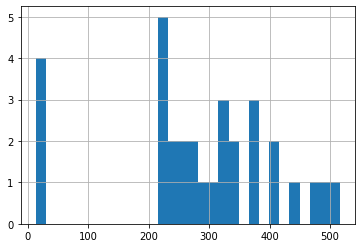

In [82]:
df[df['ceiling_height'].isna()]['total_area'].hist(bins=30)

Мы видим на графике распределение для пропущенных значений высоты потолка по общей площади для либо очень маленьких площадей, либо очень высоких. Разделим их на группы и заполним пропуски уже медианным значением в группе. Получим промежутки по 100: от 0 до 100, от 100 до 200, и т.д.

In [83]:
for i in range(100, 601, 100):
    if i % 100 == 0:
        ceiling_height_median = df[(df['total_area'] > i - 99) & (df['total_area'] <= i)]['ceiling_height'].median()
        print(f"Для диапазона площадей от {i - 99} до {i}: {ceiling_height_median}")
        df.loc[(df['total_area'] > i - 100) & (df['total_area'] <= i), 'ceiling_height'] = df.loc[(df['total_area'] > i - 100) & (df['total_area'] <= i), 'ceiling_height'].fillna(ceiling_height_median)

Для диапазона площадей от 1 до 100: 2.65
Для диапазона площадей от 101 до 200: 3.0
Для диапазона площадей от 201 до 300: 3.4
Для диапазона площадей от 301 до 400: 3.3
Для диапазона площадей от 401 до 500: 3.2
Для диапазона площадей от 501 до 600: 3.975


In [84]:
len(df[df['ceiling_height'].isna()])

0

По диапазону площадей даже можно углядеть тенденцию к увеличению высоты потолка по отношению к увеличению площади.

### Оптимизация памяти

In [85]:
### Оптимизация памяти

# функция оптимизация памяти
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            try:
                result = (props[col] - asint)
                result = result.sum()
                if result > -0.01 and result < 0.01:
                    IsInt = True
            

            
                # Make Integer/unsigned Integer datatypes
                if IsInt:
                    if mn >= 0:
                        if mx < 255:
                            props[col] = props[col].astype(np.uint8)
                        elif mx < 65535:
                            props[col] = props[col].astype(np.uint16)
                        elif mx < 4294967295:
                            props[col] = props[col].astype(np.uint32)
                        else:
                            props[col] = props[col].astype(np.uint64)
                    else:
                        if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                            props[col] = props[col].astype(np.int8)
                        elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                            props[col] = props[col].astype(np.int16)
                        elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                            props[col] = props[col].astype(np.int32)
                        elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                            props[col] = props[col].astype(np.int64)    

                # Make float datatypes 32 bit
                else:
                    props[col] = props[col].astype(np.float32)

                # Print new column type
                print("dtype after: ",props[col].dtype)
                print("******************************")
            except TypeError:
                pass
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist
df, NAlist = reduce_mem_usage(df)

Memory usage of properties dataframe is : 2.6573991775512695  MB
******************************
Column:  total_images
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  last_price
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  total_area
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  first_day_exposition
dtype before:  datetime64[ns]
******************************
Column:  rooms
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  ceiling_height
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  floors_total
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  living_area
dtype before:  float64
dtype after:  f

## Расчёты и добавление результатов в таблицу

### цена квадратного метра

In [86]:
df['sqr_meter_price'] = round(df['last_price'] / df['total_area'], 0)

In [87]:
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sqr_meter_price
1447,18,6040000,59.40,2017-12-22,3,2.80,6,36.30,3,0,...,0,Санкт-Петербург,19420,3943,0,10000,3,359,100,"101,683.00"


### день недели, месяц и год публикации объявления

In [88]:
df['exposition_day_of_week'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

In [89]:
df.sample(random_state=100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sqr_meter_price,exposition_day_of_week,exposition_month,exposition_year
19278,8,13800000,164.00,2017-08-09,3,3.90,4,117.00,2,0,...,4550,1,648,0,10000,246,"84,146.00",2,8,2017


### этаж квартиры; варианты — первый, последний, другой

In [90]:
def is_first_floor(floor):
    if floor == 1:
        return 1
    return 0

def is_last_floor(floor, floors_total):
    if floor == floors_total:
        return 1
    return 0

In [91]:
df['is_first_floor'] = df['floor'].apply(is_first_floor)

In [92]:
df['is_last_floor'] = df.apply(lambda x: is_last_floor(x.floor, x.floors_total), axis=1)

In [93]:
df.sample(random_state=100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sqr_meter_price,exposition_day_of_week,exposition_month,exposition_year,is_first_floor,is_last_floor
19278,8,13800000,164.00,2017-08-09,3,3.90,4,117.00,2,0,...,648,0,10000,246,"84,146.00",2,8,2017,0,0


In [94]:
def other_floor(is_first_floor, is_last_floor):
    if not (is_first_floor or is_last_floor):
        return 1
    return 0

In [95]:
df['is_other_floor'] = df.apply(lambda x: other_floor(x.is_first_floor, x.is_last_floor), axis=1)

In [96]:
df.sample(random_state=100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,sqr_meter_price,exposition_day_of_week,exposition_month,exposition_year,is_first_floor,is_last_floor,is_other_floor
19278,8,13800000,164.00,2017-08-09,3,3.90,4,117.00,2,0,...,0,10000,246,"84,146.00",2,8,2017,0,0,1


### соотношение жилой и общей площади, а также отношение площади кухни к общей

In [97]:
df.sample(random_state=100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,sqr_meter_price,exposition_day_of_week,exposition_month,exposition_year,is_first_floor,is_last_floor,is_other_floor
19278,8,13800000,164.00,2017-08-09,3,3.90,4,117.00,2,0,...,0,10000,246,"84,146.00",2,8,2017,0,0,1


In [98]:
df['ratio_living_total'] = round(df['living_area'] / df['total_area'], 1)
df['ratio_kitchen_total'] = round(df['kitchen_area'] / df['total_area'], 1)

In [99]:
df.sample(random_state=100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,sqr_meter_price,exposition_day_of_week,exposition_month,exposition_year,is_first_floor,is_last_floor,is_other_floor,ratio_living_total,ratio_kitchen_total
19278,8,13800000,164.00,2017-08-09,3,3.90,4,117.00,2,0,...,246,"84,146.00",2,8,2017,0,0,1,0.70,0.10


## Исследовательский анализ данных

### площадь, цена, число комнат, высота потолков

In [100]:
cols = ['total_area', 'last_price', 'rooms', 'ceiling_height']
data = df[cols]

In [101]:
data.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.00,0.65,0.77,0.13
last_price,0.65,1.00,0.37,0.09
rooms,0.77,0.37,1.00,0.09
ceiling_height,0.13,0.09,0.09,1.00


Видно, что высота потолков не имеет линейной корреляции, в то время как площадь имеет выраженную линейную корреляцию - 0.64. Видно также, что площадь сильно корреирует с количеством комнат.

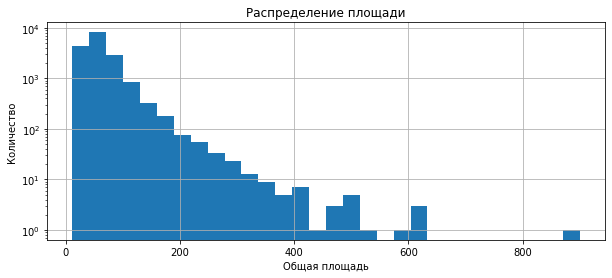

In [102]:
df['total_area'].hist(bins=30, log=True, figsize=(10, 4))
plt.title('Распределение площади')
plt.ylabel('Количество')
plt.xlabel('Общая площадь')
plt.show()

In [103]:
len(df.query('total_area > 400'))

19

Скорее всего это уже речь идет о домах, в квартирах таких площадей нет, и в нашем датасете таких единицы

In [104]:
df = df.query('total_area < 400')

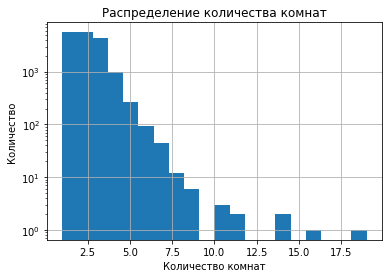

In [105]:
df['rooms'].hist(bins=20, log=True)
plt.title('Распределение количества комнат')
plt.ylabel('Количество')
plt.xlabel('Количество комнат')
plt.show()

In [106]:
len(df.query('rooms > 12'))

4

Скорее всего тут также речь идет о домах, так как у нас всего 4 наблюдения с количеством комнат более 12

In [107]:
df = df.query('rooms < 12')

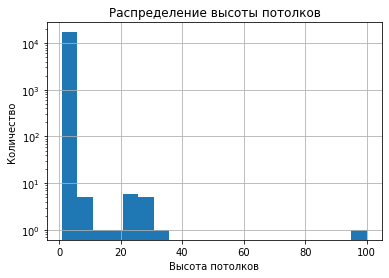

In [108]:
df['ceiling_height'].hist(bins=20, log=True)
plt.title('Распределение высоты потолков')
plt.ylabel('Количество')
plt.xlabel('Высота потолков')
plt.show()

Если не поставить log=True, то не будет видно выбросов, изучим поближе

In [109]:
len(df.query('ceiling_height > 4'))

54

Опять же, это либо речь о домах, либо об аномалиях, то есть высота потолков 100 м - врядли это корректные данные

In [110]:
df.query('ceiling_height >= 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,sqr_meter_price,exposition_day_of_week,exposition_month,exposition_year,is_first_floor,is_last_floor,is_other_floor,ratio_living_total,ratio_kitchen_total
4643,0,4300000,45.00,2018-02-01,2,25.00,9,30.00,2,0,...,181,"95,556.00",3,2,2018,0,0,1,0.70,0.20
5076,0,3850000,30.50,2018-10-03,1,24.00,5,19.50,1,1,...,7,"126,230.00",2,10,2018,1,0,0,0.60,0.20
5669,4,4400000,50.00,2017-08-08,2,26.00,9,21.30,3,0,...,267,"88,000.00",1,8,2017,0,0,1,0.40,0.10
5807,17,8150000,80.00,2019-01-09,2,27.00,36,41.00,13,0,...,38,"101,875.00",2,1,2019,0,0,1,0.50,0.20
6246,6,3300000,44.40,2019-03-25,2,25.00,5,31.30,5,0,...,100,"74,324.00",0,3,2019,0,1,0,0.70,0.10
9379,5,3950000,42.00,2017-03-26,3,25.00,5,30.00,2,0,...,100,"94,048.00",6,3,2017,0,0,1,0.70,0.10
17496,15,6700000,92.90,2019-02-19,3,20.00,17,53.20,14,0,...,100,"72,121.00",1,2,2019,0,0,1,0.60,0.10
17857,1,3900000,56.00,2017-12-22,3,27.00,5,33.00,4,0,...,73,"69,643.00",4,12,2017,0,0,1,0.60,0.20
18545,6,3750000,43.00,2019-03-18,2,25.00,5,29.00,3,0,...,12,"87,209.00",0,3,2019,0,0,1,0.70,0.20
20478,11,8000000,45.00,2017-07-18,1,27.00,4,22.00,2,0,...,429,"177,778.00",1,7,2017,0,0,1,0.50,0.20


Судя по отношению высоты потолков и площади это изначально площади были * 10, то есть 25.0 на самом деле это 2.5, так будет весьма подходить, что касается выброса в 100м удалим это наблюдение, так как у него total_area = 25, а last_price = 15000000, и это еще и апартаменты, не похоже на помещение под жилые нужды.

In [111]:
def ceiling_to_normal(ceil):
    if ceil >= 20:
        return ceil * 0.1
    return ceil
df['ceiling_height'] = df['ceiling_height'].apply(ceiling_to_normal)

In [112]:
df = df.query('ceiling_height <= 8')

In [113]:
df['ceiling_height'].describe()

count   17,066.00
mean         2.72
std          0.26
min          1.00
25%          2.55
50%          2.65
75%          2.80
max          8.00
Name: ceiling_height, dtype: float64

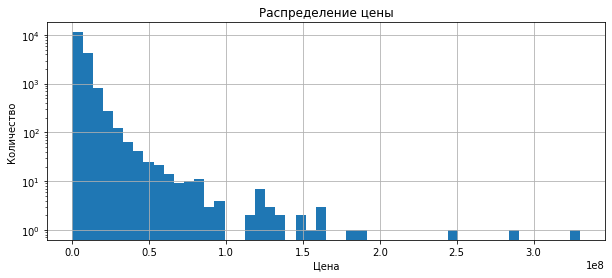

In [114]:
df['last_price'].hist(bins=50, log=True, figsize=(10, 4))
plt.title('Распределение цены')
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.show()

In [115]:
len(df.query('last_price > 100000000'))

25

Объектов строимостью выше 100 млн - 25

### время продажи квартиры

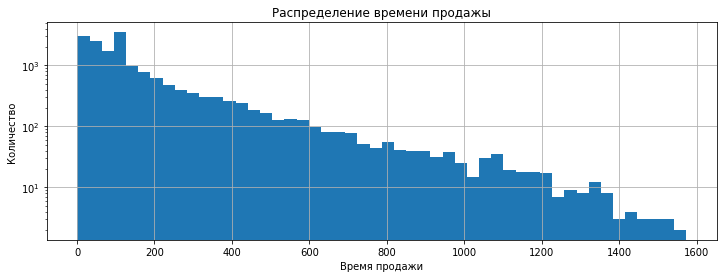

In [116]:
df['days_exposition'].hist(bins=50, log=True, figsize=(12, 4))
plt.title('Распределение времени продажы')
plt.ylabel('Количество')
plt.xlabel('Время продажи')
plt.show()

In [117]:
df['days_exposition'].describe()

count   17,066.00
mean       173.83
std        211.31
min          1.00
25%         47.00
50%        100.00
75%        205.00
max      1,572.00
Name: days_exposition, dtype: float64

В среднем продают за 174 дня(5,8 мес), но чаще всего время продажи составляет 100 дней(3,3 мес)

In [118]:
df.pivot_table(values='exposition_month', index='exposition_year', columns=None, aggfunc='median')

,exposition_month
exposition_year,
2014,12
2015,8
2016,5
2017,8
2018,7
2019,3


Чаще всего недвижимость выставляют на продажу летом - июль, август(в 2015, 2017, 2018 годах), также в мае(2016) или марте(2019). Аномально оппозиционно самому частому времени года было в 2014 году в декабре, возможно это связано с ростом курса валют.

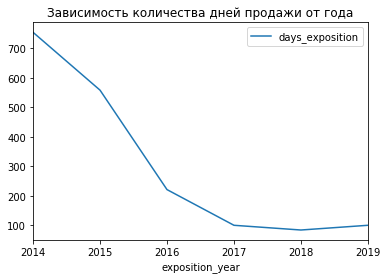

In [119]:
df.pivot_table(values='days_exposition', index='exposition_year', columns=None, aggfunc='median').plot(
    title='Зависимость количества дней продажи от года')

In [120]:
df.pivot_table(values='days_exposition', index='exposition_year', columns=None, aggfunc='median')

,days_exposition
exposition_year,
2014,754
2015,558
2016,221
2017,100
2018,84
2019,100


В 2018 году можно было быстрее всего продать квартиру. С 2014 года срок продажи уменьшался с 754 до 84 дня в 2018. И в 2019 опять подрос до 100 дней.

### факторы влияющие на стоимость квартиры

Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.

In [121]:
cols = ['last_price', 'total_area', 'rooms', 'is_first_floor', 'is_last_floor', 'is_other_floor', 'city_centers_nearest']

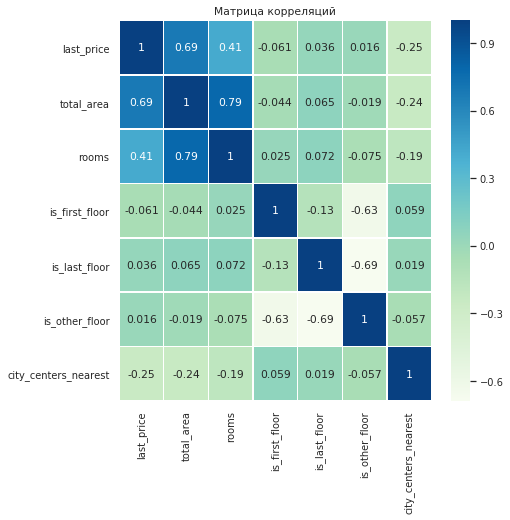

In [122]:
data = df[cols]
plt.figure(figsize = (7, 7))

sns.set(font_scale=.9)
sns.heatmap(data.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Матрица корреляций')
plt.show()

Как и было замечено ранее, больше всего на цену влияет площадь, в меньшей степени количество комнат, хотя и тут мы знаем, что комнаты связаны с площадью. Этажность и близость к ентре города не влияют на цену линейно.

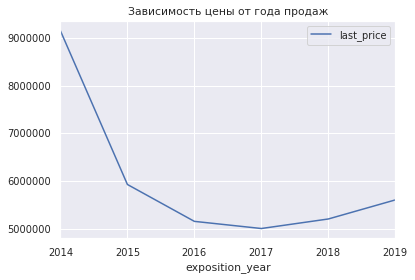

In [123]:
df.pivot_table(values=['last_price'], index='exposition_year', columns=None, aggfunc='median').plot(
    title='Зависимость цены от года продаж')

Медианная цена на квартиры резко упала в период с 2014 года по 2015, дальше падение сохранялось, и только после 2017 начался медленный рост. Это выборка по всем квартирам, но если взять выборку по количеству комнат.

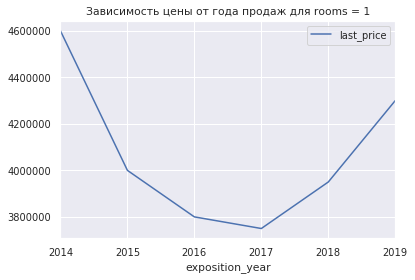

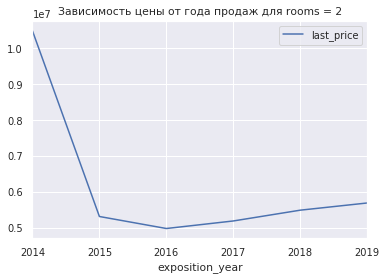

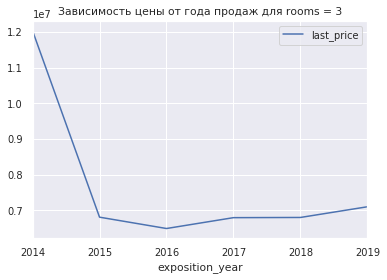

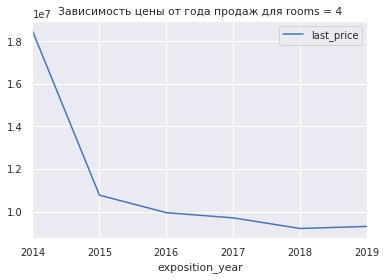

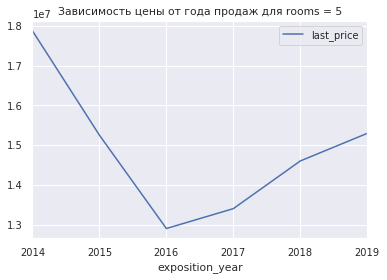

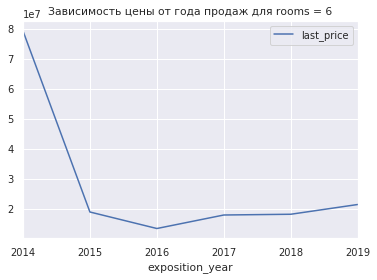

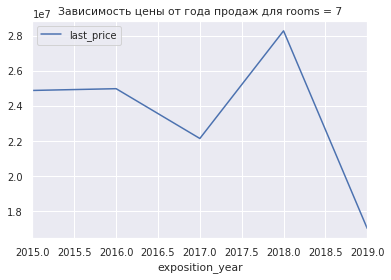

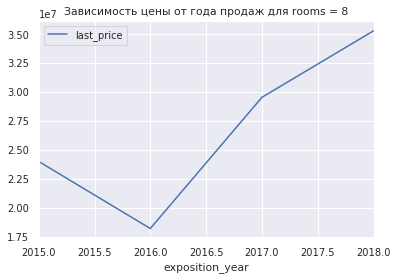

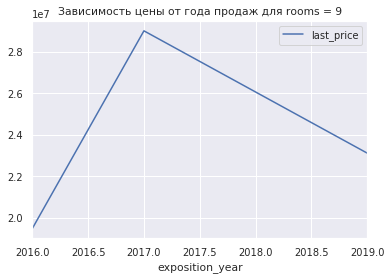

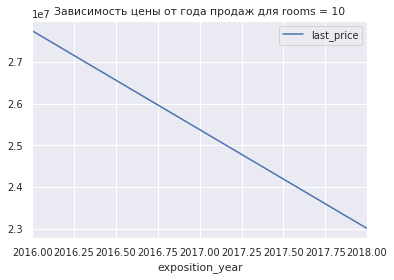

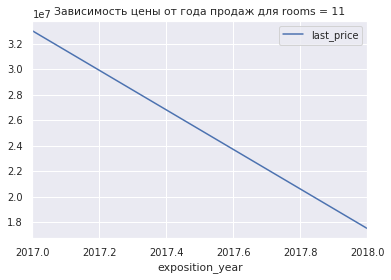

In [124]:
rooms = sorted(df['rooms'].unique())
for r in rooms:
    df.query('rooms == @r').pivot_table(values=['last_price'], index='exposition_year', columns=None, aggfunc='median').plot(
    title=f'Зависимость цены от года продаж для rooms = {r}')

Из графиков видно, что однушки дешевели с 2014 по 2017 и после опять стали расти в цене. В то время как двушки достигли "дна" раньше, к 2016 году, а после начали медленно расти, но до конца не восстановились. Примерно аналогичная ситуация и с 3-шками, а вот 4-х комнатные квартиры до сих пор не растут. По 5-комнатным и выше мало наблюдений, что бы дать какой-то аналогичный вывод.

In [125]:
df_first_floor = df.query("is_first_floor == 1")
df_last_floor = df.query("is_last_floor == 1")
df_other_floor = df.query("is_other_floor == 1")

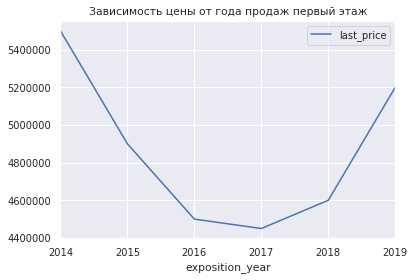

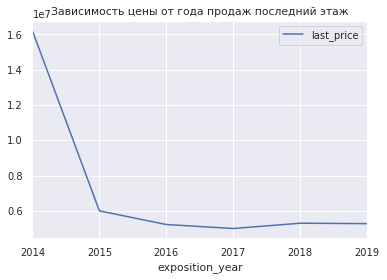

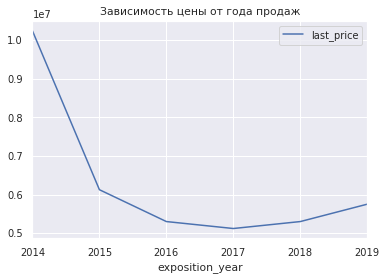

In [126]:
df_first_floor.pivot_table(values=['last_price'], index='exposition_year', columns=None, aggfunc='median').plot(
    title='Зависимость цены от года продаж первый этаж')
df_last_floor.pivot_table(values=['last_price'], index='exposition_year', columns=None, aggfunc='median').plot(
    title='Зависимость цены от года продаж последний этаж')
df_other_floor.pivot_table(values=['last_price'], index='exposition_year', columns=None, aggfunc='median').plot(
    title='Зависимость цены от года продаж')
plt.show()

Если учитывать только параметр этажности то квартиры с первым этажем быстрее восстановили своб цену, в то время как остальные этажи так и не вернули свою цену. Также можно отменить что падение цены с 2014 года сравняло цены к 2019 году, так как медианная цена первого этажа стала 5млн 200тыс, а медианная стоимость остальных этажей ~5млн 500тыс, но до 6 млн.

Посмотри зависимость удаления от центра и цены, по наблюдениям с наибольшим количеством данных

In [127]:
df['locality_name'].value_counts().head(1)

Санкт-Петербург    14722
Name: locality_name, dtype: int64

In [128]:
df_spb = df.query('locality_name == "Санкт-Петербург"')

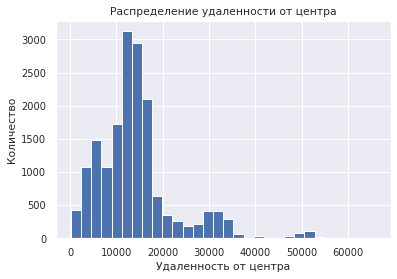

In [129]:
df['city_centers_nearest'].hist(bins=30)
plt.title('Распределение удаленности от центра')
plt.ylabel('Количество')
plt.xlabel('Удаленность от центра')
plt.show()

Разобьем city_centers_nearest на 5 частей, проверим, сгруппируем и посмотрим медианную цену

In [130]:
df['dist_bin'] = pd.cut(df['city_centers_nearest'], 5)
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,sqr_meter_price,exposition_day_of_week,exposition_month,exposition_year,is_first_floor,is_last_floor,is_other_floor,ratio_living_total,ratio_kitchen_total,dist_bin
8362,2,12900000,100.00,2018-09-07,3,3.00,17,53.00,14,0,...,"129,000.00",4,9,2018,0,0,1,0.50,0.20,"(115.213, 13338.4]"


In [131]:
df.groupby('dist_bin')['last_price'].agg(['count', 'median'])

,count,median
dist_bin,,
"(115.213, 13338.4]",8898,6300000
"(13338.4, 26495.8]",6477,4700000
"(26495.8, 39653.2]",1391,4000000
"(39653.2, 52810.6]",264,3700000
"(52810.6, 65968.0]",36,3600000


Уже из сгруппированных данных видно, что чем дальше от центра, тем меньше цена

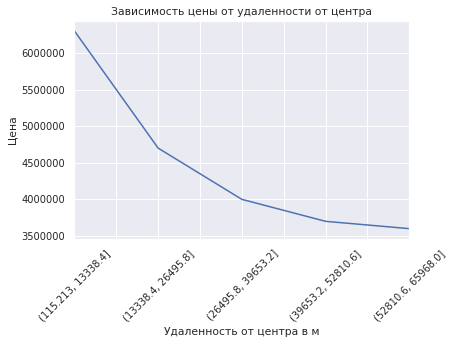

In [132]:
df.groupby('dist_bin')['last_price'].median().plot(rot=45)
plt.title('Зависимость цены от удаленности от центра')
plt.ylabel('Цена')
plt.xlabel('Удаленность от центра в м')
plt.show()

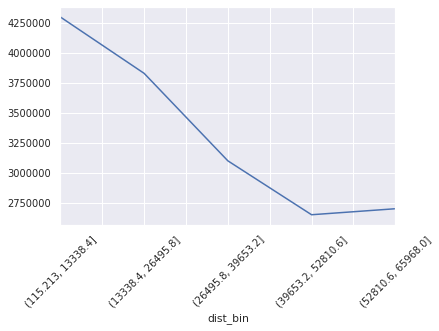

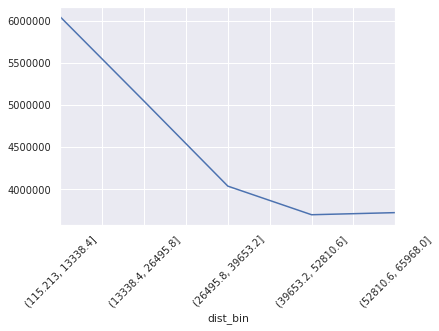

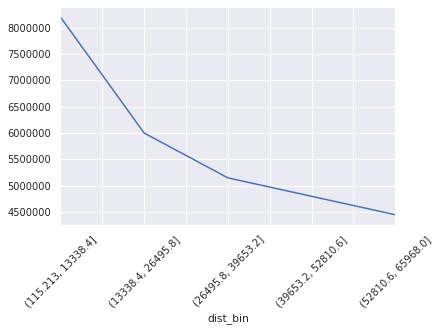

In [133]:
for rooms in range(1, 4):
    (df[df['rooms'] == rooms]
    .groupby('dist_bin')['last_price']
    .median().plot(rot=45))
    plt.show()

Видно, что нет зависимости от количества комнат, но чем дальше от центра тем ниже стоимость, можно добавить только что для 3-х комнатных это падение происходит быстрее

### зависимость от даты размещения: дня недели, месяца и года

In [134]:
df.groupby('exposition_day_of_week')['last_price'].agg(['count', 'median']).sort_values('median', ascending=False)

,count,median
exposition_day_of_week,,
3,3115,5342000
2,2864,5300000
1,3068,5295000
0,2621,5265000
4,2898,5190000
5,1321,5180000
6,1179,5150000


In [135]:
df.groupby('exposition_month')['last_price'].agg(['count', 'median']).sort_values('median', ascending=False)

,count,median
exposition_month,,
12,1057,5600000
1,1027,5390000
4,1745,5350000
3,1799,5324000
9,1478,5300000
2,1883,5200000
8,1296,5200000
11,1758,5200000
7,1223,5150000


In [136]:
df.groupby('exposition_year')['last_price'].agg(['count', 'median']).sort_values('median')

,count,median
exposition_year,,
2017,6087,"5,000,000.00"
2016,2083,"5,150,000.00"
2018,5750,"5,200,000.00"
2019,2120,"5,600,000.00"
2015,918,"5,924,498.50"
2014,108,"9,150,000.00"


- Объявления с датой размещения в ср незначительно дороже остальных, при этом размещенные в сб дешевле
- Мы уже знаем, что чаще размещают объявления летом, при этом цена продажи дороже у тех объявлений, которые выставились в декабре, январе и апреле
- И конечно цена зависит от года в нашем датасете, выгодно было продавать квартиру в 2014, а покупать в 2017

In [137]:
df.groupby('locality_name')['sqr_meter_price'].agg(['count', 'mean']).sort_values('count', ascending=False).head(10).sort_values('mean',  ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,14722,"114,029.83"
Пушкин,345,"103,326.34"
Сестрорецк,170,"101,515.58"
поселок Парголово,302,"90,382.14"
Петергоф,197,"84,480.59"
Кронштадт,91,"79,544.76"
поселок Шушары,406,"78,672.28"
Колпино,327,"75,320.83"
Ломоносов,130,"72,792.05"


Из десяти населенных пунктов с наибольшим числом объявлений, наибольшая средняя цена за кв метр в "Санкт-Петербург" - 114029, а наименьшая в "Красное Село" - 72136

выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

In [138]:
df_spb['city_centers_nearest'].max()

29493

In [139]:
df_spb['dist_bin'] = pd.cut(df_spb['city_centers_nearest'], [i * 1000 for i in range(30)] + [np.inf])
df_spb.sample()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,sqr_meter_price,exposition_day_of_week,exposition_month,exposition_year,is_first_floor,is_last_floor,is_other_floor,ratio_living_total,ratio_kitchen_total,dist_bin
16227,12,7580000,38.10,2017-03-14,1,2.60,4,22.80,4,0,...,"198,950.00",1,3,2017,0,1,0,0.60,0.20,"(3000.0, 4000.0]"


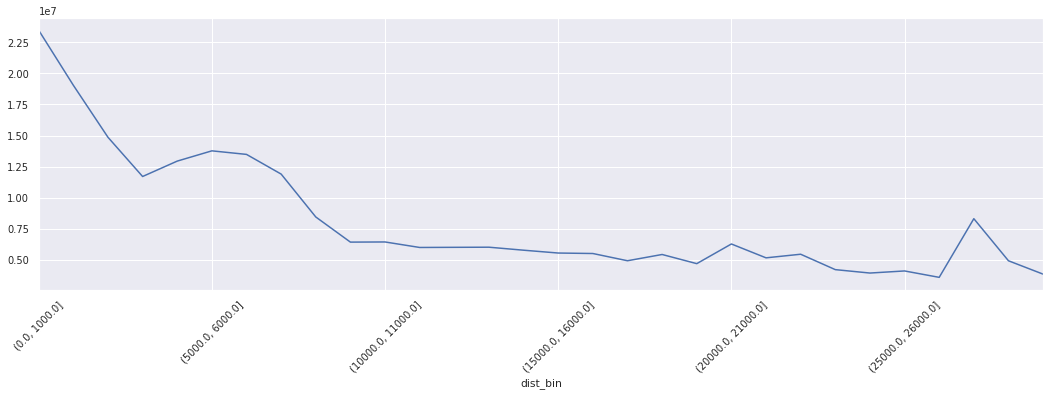

In [140]:
df_spb.groupby('dist_bin')['last_price'].mean().plot(rot=45, figsize=(18, 5))
plt.show()

При удаленности от центра на 8 км цена плавно идет вниз, а до этого спад под большим углом, следовательно перелом в цене на 8 км. Это и есть центр

### сегмент квартир в центре

выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

In [141]:
df_spb_center = df_spb.query('city_centers_nearest < 8000')

In [142]:
df_spb_center['living_area'].median(), df_spb['living_area'].median()

(45.0, 31.1)

In [143]:
df_spb_center['last_price'].median(), df_spb['last_price'].median()

(9000000.0, 5500000.0)

In [144]:
df_spb_center['rooms'].median(), df_spb['rooms'].median()

(3.0, 2.0)

In [145]:
df_spb_center['ceiling_height'].median(), df_spb['ceiling_height'].median()

(2.990000009536743, 2.6500000953674316)

In [146]:
df_spb_center.groupby('exposition_year')['last_price'].agg(['count', 'median']).sort_values('median')

,count,median
exposition_year,,
2018,1009,8700000
2017,1231,8900000
2019,371,9300000
2016,500,9350000
2015,312,9976240
2014,25,19090000


Квартиры в центре чаще имет 3 комнаты, а не 2 как по городу, у них выше потолки ~3 против 2.65 по городу, площадь также выше, медиана для центра 45, по городу 31.1, и цена тут также выше - 9000000 против 5500000. При этом и падает в стоимости такое жилье также как и остальное жилье по городу, даже быстрее.

## Общий вывод

- Важный фактор при покупке жилья это площадь - она в прямой зависимости от цены(0.64). При этом этажность дома важна, но не всегда сильно.
- Высота потолков явно не влияет на цену, но у дорогих квартир в центре высокие потолки ~3м против 2.65м по городу.
- Больше всего однакомнатных квартир, а квартир с 10 комнатами можно встретить не часто.
- В среднем квартиру можно продать за 174 дня, но если сразу выставить рыночную цену, то можно уложиться в 100 дней.
- Чаще всего недвижимость выставляют на продажу в мае и летом, но при этом выгоднее всего можно продать жилье, выставив его зимой - в декабре и январе, а также в апреле.
- В 2014 году недвижимость продавалась долго, из-за скачка курса доллара цены на квартиры не сразу стали снижать, но при снижении цены уже ближе к 2018 году ее можно было продать за 84 дня.
- 2017 год был переломным для стоимости жилья, до этого она падала, после начала расти. 
- При этом однушки на первом этаже быстрее восстанавливали свой рост цены, а четыхкомнатные до сих пор не отыграли падение.
- Близость к центру важна, чем ближе тем лучше, а если квартира в радиусе 8 км от центра Санкт-Петербурга, то цена возрастает еще быстрее, вместе с потолками и средней площадью(45.0, 31.1).
- Идеально было продать квартиру в 2014 году и купить в 2017 - разница в цене в два раза вне зависимости от близости к центру.
- В центре квартиры больше, выше, и конечно дороже.